In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Гаврин Глеб

# Использую все оставшиеся дни для продления дедлайна(не понял, сколько у меня осталось после прошлой дз)

In [2]:
 #pip install --upgrade pandas

In [3]:
df_stocks = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/stocks.csv')
print(df_stocks.shape)
df_stocks.head()

(17572, 8)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,29.12.2023,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,28.12.2023,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,27.12.2023,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,26.12.2023,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,22.12.2023,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


In [4]:
df_rates = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/exchange_rates.csv')
print(df_rates.shape)
df_rates.head()

(3652, 4)


,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,01.01.2014,"45,189","32,855","4,237"
1,02.01.2014,"45,254","33,1","4,269"
2,03.01.2014,"45,114","33,2","4,282"
3,04.01.2014,"45,125","33,248","4,288"
4,05.01.2014,"45,228","33,255","4,289"


# №1

а)

In [5]:
df_stocks['Дата'] = pd.to_datetime(df_stocks['Дата'])

C:\Users\Gavrin Gleb\AppData\Local\Temp\ipykernel_26492\2240995890.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_stocks['Дата'] = pd.to_datetime(df_stocks['Дата'])


In [6]:
df_stocks

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,2023-12-29,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,2023-12-28,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,2023-12-27,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,2023-12-26,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,2023-12-22,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL
...,...,...,...,...,...,...,...,...
17567,2014-01-08,"97,34","97,92","98,11","97,01","18,87M","1,52%",Tencent
17568,2014-01-07,"95,88","97,34","97,34","95,65","15,02M","-0,32%",Tencent
17569,2014-01-06,"96,19","95,88","97,72","95,10","20,38M","0,32%",Tencent
17570,2014-01-03,"95,88","97,04","97,92","95,65","18,60M","-2,08%",Tencent


In [7]:
df_rates_1 = df_rates[::-1]
df_rates_1['Дата'] = pd.to_datetime(df_rates_1['Дата'])

C:\Users\Gavrin Gleb\AppData\Local\Temp\ipykernel_26492\3452475187.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_rates_1['Дата'] = pd.to_datetime(df_rates_1['Дата'])


In [8]:
df_rates_1

,Дата,EUR_RUB,USD_RUB,HKD_RUB
3651,2023-12-31,NaN,NaN,NaN
3650,2023-12-30,NaN,NaN,NaN
3649,2023-12-29,"98,596","90,36","11,429"
3648,2023-12-28,"97,919","89,36","11,325"
3647,2023-12-27,"101,779","91,27","11,731"
...,...,...,...,...
4,2014-01-05,"45,228","33,255","4,289"
3,2014-01-04,"45,125","33,248","4,288"
2,2014-01-03,"45,114","33,2","4,282"
1,2014-01-02,"45,254","33,1","4,269"


In [9]:
# метод нашел здесь:https://www.codecamp.ru/blog/convert-columns-to-datetime-pandas/

б)

In [10]:
import string

In [11]:
def correct_values(value):

    corrected_value = value.rstrip('MBK%')
    corrected_value = corrected_value.replace(',', '.')
    corrected_value = corrected_value.replace('.', '')
    #corrected_value = corrected_value.rstrip('')
    
     
    corrected_value = float(corrected_value)
    if 'B' in value:
        #corrected_value = float(corrected_value)
        corrected_value *= 10**9 
    elif 'M' in value:
        #corrected_value = float(corrected_value)
        corrected_value *= 10**6
        
    elif 'K' in value:
        #corrected_value = float(corrected_value)
        corrected_value *= 10**3
   # corrected_value = float(corrected_value)
    return corrected_value

In [12]:
correct_values('2.024,93B')

202493000000000.0

In [13]:
# в процессе написания функции использовал:https://evileg.com/ru/post/642/ , https://pythonist.ru/5-sposobov-udalit-simvol-iz-stroki/

In [14]:
#df_stocks.map(correct_values, na_action='ignore')

In [15]:
df_stocks[['Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %']] = df_stocks[['Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %']].map(correct_values, na_action='ignore')

In [16]:
df_stocks

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,2023-12-29,19253.0,19390.0,19440.0,19173.0,4.267000e+09,-54.0,AAPL
1,2023-12-28,19358.0,19414.0,19466.0,19317.0,3.383000e+09,22.0,AAPL
2,2023-12-27,19315.0,19249.0,19350.0,19109.0,4.790000e+09,5.0,AAPL
3,2023-12-26,19305.0,19361.0,19389.0,19283.0,2.881000e+09,-28.0,AAPL
4,2023-12-22,19360.0,19518.0,19541.0,19297.0,3.715000e+09,-55.0,AAPL
...,...,...,...,...,...,...,...,...
17567,2014-01-08,9734.0,9792.0,9811.0,9701.0,1.887000e+09,152.0,Tencent
17568,2014-01-07,9588.0,9734.0,9734.0,9565.0,1.502000e+09,-32.0,Tencent
17569,2014-01-06,9619.0,9588.0,9772.0,9510.0,2.038000e+09,32.0,Tencent
17570,2014-01-03,9588.0,9704.0,9792.0,9565.0,1.860000e+09,-208.0,Tencent


In [17]:
df_rates_1[['EUR_RUB', 'USD_RUB', 'HKD_RUB']] = df_rates_1[['EUR_RUB', 'USD_RUB', 'HKD_RUB']].map(correct_values, na_action='ignore')

In [18]:
df_rates_1

,Дата,EUR_RUB,USD_RUB,HKD_RUB
3651,2023-12-31,NaN,NaN,NaN
3650,2023-12-30,NaN,NaN,NaN
3649,2023-12-29,98596.0,9036.0,11429.0
3648,2023-12-28,97919.0,8936.0,11325.0
3647,2023-12-27,101779.0,9127.0,11731.0
...,...,...,...,...
4,2014-01-05,45228.0,33255.0,4289.0
3,2014-01-04,45125.0,33248.0,4288.0
2,2014-01-03,45114.0,332.0,4282.0
1,2014-01-02,45254.0,331.0,4269.0


в)

In [19]:
df_merged = df_stocks.merge(df_rates_1, how = 'left', on='Дата')

df_merged.head() #https://pythonru.com/uroki/osnovy-pandas-3-vazhnye-metody-formatirovanija-dannyh

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,19253.0,19390.0,19440.0,19173.0,4.267000e+09,-54.0,AAPL,98596.0,9036.0,11429.0
1,2023-12-28,19358.0,19414.0,19466.0,19317.0,3.383000e+09,22.0,AAPL,97919.0,8936.0,11325.0
2,2023-12-27,19315.0,19249.0,19350.0,19109.0,4.790000e+09,5.0,AAPL,101779.0,9127.0,11731.0
3,2023-12-26,19305.0,19361.0,19389.0,19283.0,2.881000e+09,-28.0,AAPL,101455.0,9166.0,11734.0
4,2023-12-22,19360.0,19518.0,19541.0,19297.0,3.715000e+09,-55.0,AAPL,101467.0,920.0,11791.0


In [20]:
stocks_currency_dict = {
    "AAPL": "USD_RUB",
    "MSFT": "USD_RUB",
    "MBGn": "EUR_RUB",
    "BMWG": "EUR_RUB",
    "Tencent": "HKD_RUB",
}

for ticker, curr_pair in stocks_currency_dict.items():
    df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']] = df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']].values*df_merged.loc[df_merged['Тикер'] == ticker, [curr_pair]].values

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,173970108.0,175208040.0,175659840.0,173247228.0,4.267000e+09,-54.0,AAPL,98596.0,9036.0,11429.0
1,2023-12-28,172983088.0,173483504.0,173948176.0,172616712.0,3.383000e+09,22.0,AAPL,97919.0,8936.0,11325.0
2,2023-12-27,176288005.0,175685623.0,176607450.0,174407843.0,4.790000e+09,5.0,AAPL,101779.0,9127.0,11731.0
3,2023-12-26,176949630.0,177462926.0,177719574.0,176747978.0,2.881000e+09,-28.0,AAPL,101455.0,9166.0,11734.0
4,2023-12-22,17811200.0,17956560.0,17977720.0,17753240.0,3.715000e+09,-55.0,AAPL,101467.0,920.0,11791.0


# №2

а)

In [21]:
df_merged.isnull().mean()

Дата       0.000000
Цена       0.000000
Откр.      0.000000
Макс.      0.000000
Мин.       0.000000
Объём      0.000512
Изм. %     0.000000
Тикер      0.000000
EUR_RUB    0.000000
USD_RUB    0.000000
HKD_RUB    0.000000
dtype: float64

пропуски есть только в столбце Объём 

In [22]:
df_merged[df_merged.isna().any(axis=1)]

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
1974,2016-02-27,7.441300e+08,7.441300e+08,7.441300e+08,7.441300e+08,NaN,30012.0,AAPL,83492.0,76754.0,9891.0
2800,2022-11-21,5.195406e+09,5.214671e+09,5.238908e+09,5.191055e+09,NaN,-65.0,BMWG,62146.0,6085.0,7849.0
2944,2022-05-03,5.745283e+09,5.618137e+09,5.745283e+09,5.593714e+09,NaN,301.0,BMWG,71834.0,7096.0,8697.0
2945,2022-05-02,5.760655e+09,5.768075e+09,5.820755e+09,5.517289e+09,NaN,-111.0,BMWG,74197.0,7344.0,9006.0
7838,2022-11-21,3.847459e+09,3.833165e+09,3.882261e+09,3.825086e+09,NaN,-50.0,MBGn,62146.0,6085.0,7849.0
7981,2022-05-04,4.377311e+09,4.422257e+09,4.443326e+09,4.374502e+09,NaN,-87.0,MBGn,70228.0,663.0,8425.0
7982,2022-05-03,4.516922e+09,4.476695e+09,4.517640e+09,4.424974e+09,NaN,106.0,MBGn,71834.0,7096.0,8697.0
7988,2022-04-25,5.181592e+09,5.173474e+09,5.227863e+09,5.110967e+09,NaN,-139.0,MBGn,81178.0,73125.0,956.0
17313,2015-01-17,1.037632e+08,1.037632e+08,1.037632e+08,1.037632e+08,NaN,482.0,Tencent,75166.0,64942.0,8368.0


вывел пропущенные наблюдения без данных объёмов, почти у всех тикеров они встречаются

In [23]:
df_merged.dropna()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,173970108.0,175208040.0,175659840.0,173247228.0,4.267000e+09,-54.0,AAPL,98596.0,9036.0,11429.0
1,2023-12-28,172983088.0,173483504.0,173948176.0,172616712.0,3.383000e+09,22.0,AAPL,97919.0,8936.0,11325.0
2,2023-12-27,176288005.0,175685623.0,176607450.0,174407843.0,4.790000e+09,5.0,AAPL,101779.0,9127.0,11731.0
3,2023-12-26,176949630.0,177462926.0,177719574.0,176747978.0,2.881000e+09,-28.0,AAPL,101455.0,9166.0,11734.0
4,2023-12-22,17811200.0,17956560.0,17977720.0,17753240.0,3.715000e+09,-55.0,AAPL,101467.0,920.0,11791.0
...,...,...,...,...,...,...,...,...,...,...,...
17567,2014-01-08,41651786.0,41899968.0,41981269.0,41510579.0,1.887000e+09,152.0,Tencent,45039.0,33177.0,4279.0
17568,2014-01-07,40979112.0,41603116.0,41603116.0,40880810.0,1.502000e+09,-32.0,Tencent,45123.0,3314.0,4274.0
17569,2014-01-06,41198177.0,41065404.0,41853476.0,40731330.0,2.038000e+09,32.0,Tencent,45259.0,3321.0,4283.0
17570,2014-01-03,41055816.0,41552528.0,41929344.0,40957330.0,1.860000e+09,-208.0,Tencent,45114.0,332.0,4282.0


удалил строки с пропущенными данными

б)

In [24]:
df_stocks.nunique()

Дата       2608
Цена      12355
Откр.     11908
Макс.     12359
Мин.      12370
Объём      9154
Изм. %     1284
Тикер         7
dtype: int64

7 уникальных тикеров

в)

In [25]:
(df_merged['Макс.'] - df_merged['Мин.']).abs().idxmax()

2623

In [26]:
df_merged.loc[[2623]]

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
2623,2023-08-01,1.066787e+10,1.128223e+10,1.136157e+10,1.051733e+10,299000000.0,-539.0,BMWG,101715.0,9233.0,11855.0


Наибольшая разница минимальной и максимальной цен была зафиксирована у акций компании BMW 1го августа 2023 года

г)

In [27]:
df_merged['Объём'].abs().idxmax()

12780

In [28]:
df_merged.loc[[12780]]

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
12780,2023-04-27,22465.0,20850.0,22790.0,20815.0,7.032700e+13,832.0,VTBR,90293.0,81332.0,10395.0


Рекорд установлен банком ВТБ 27 апреля 2023. Заметим, что за тот день акция сильно выросла в цене.

д)

In [29]:
def absdf(x):
    return abs(x)

df_merged['Изм. по модулю'] = df_merged['Изм. %'].apply(absdf)

In [30]:
df_merged

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB,Изм. по модулю
0,2023-12-29,173970108.0,175208040.0,175659840.0,173247228.0,4.267000e+09,-54.0,AAPL,98596.0,9036.0,11429.0,54.0
1,2023-12-28,172983088.0,173483504.0,173948176.0,172616712.0,3.383000e+09,22.0,AAPL,97919.0,8936.0,11325.0,22.0
2,2023-12-27,176288005.0,175685623.0,176607450.0,174407843.0,4.790000e+09,5.0,AAPL,101779.0,9127.0,11731.0,5.0
3,2023-12-26,176949630.0,177462926.0,177719574.0,176747978.0,2.881000e+09,-28.0,AAPL,101455.0,9166.0,11734.0,28.0
4,2023-12-22,17811200.0,17956560.0,17977720.0,17753240.0,3.715000e+09,-55.0,AAPL,101467.0,920.0,11791.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17567,2014-01-08,41651786.0,41899968.0,41981269.0,41510579.0,1.887000e+09,152.0,Tencent,45039.0,33177.0,4279.0,152.0
17568,2014-01-07,40979112.0,41603116.0,41603116.0,40880810.0,1.502000e+09,-32.0,Tencent,45123.0,3314.0,4274.0,32.0
17569,2014-01-06,41198177.0,41065404.0,41853476.0,40731330.0,2.038000e+09,32.0,Tencent,45259.0,3321.0,4283.0,32.0
17570,2014-01-03,41055816.0,41552528.0,41929344.0,40957330.0,1.860000e+09,-208.0,Tencent,45114.0,332.0,4282.0,208.0


In [31]:
df_average = df_merged[['Дата','Тикер', 'Изм. по модулю']].copy()

In [32]:
df_average

,Дата,Тикер,Изм. по модулю
0,2023-12-29,AAPL,54.0
1,2023-12-28,AAPL,22.0
2,2023-12-27,AAPL,5.0
3,2023-12-26,AAPL,28.0
4,2023-12-22,AAPL,55.0
...,...,...,...
17567,2014-01-08,Tencent,152.0
17568,2014-01-07,Tencent,32.0
17569,2014-01-06,Tencent,32.0
17570,2014-01-03,Tencent,208.0


In [33]:
#df_average.groupby(['Дата']).mean()

In [34]:
#df_average = df_average.groupby(['Дата'], sort=False, as_index=False).mean()
#print (df_average.groupby('Дата', sort=False, as_index=False).mean())

In [35]:
dates = df_average.Дата.unique()

In [36]:
dates

<DatetimeArray>
['2023-12-29 00:00:00', '2023-12-28 00:00:00', '2023-12-27 00:00:00',
 '2023-12-26 00:00:00', '2023-12-22 00:00:00', '2023-12-21 00:00:00',
 '2023-12-20 00:00:00', '2023-12-19 00:00:00', '2023-12-18 00:00:00',
 '2023-12-15 00:00:00',
 ...
 '2017-04-14 00:00:00', '2016-12-26 00:00:00', '2016-03-25 00:00:00',
 '2016-02-20 00:00:00', '2015-12-25 00:00:00', '2015-05-25 00:00:00',
 '2015-04-03 00:00:00', '2014-12-25 00:00:00', '2014-04-18 00:00:00',
 '2015-01-17 00:00:00']
Length: 2608, dtype: datetime64[ns]

In [37]:
#dict_dates = {}
#for date in dates:
 #   dict[date] = []
#dict_dates    

In [38]:
dict_dates = {l:[] for l in dates}

In [39]:
#https://stackoverflow.com/questions/12905999/how-to-create-key-or-append-an-element-to-key

In [40]:
#for k in dict_dates:
 #   for index, row in df_average.iterrows():
  #      if row['Дата'] == k:
   #         dict_dates[k].append(row['Изм. по модулю'])

In [41]:
#df_merged['aбсолютИзм'] = df_merged['Изм. по модулю'].abs()

mean_diff = df_merged.groupby('Дата')['Изм. по модулю'].mean()

top5 = mean_diff.nlargest(5)

print(top5)

Дата
2016-02-27    15009.000000
2022-02-24     1308.142857
2016-02-29     1184.000000
2020-03-24     1079.571429
2020-03-12     1061.571429
Name: Изм. по модулю, dtype: float64


In [42]:
top5_ind = top5.index

top5_diff = df_merged[df_merged['Дата'].isin(top5_ind)][['Дата', 'Изм. %']]

print(top5_diff)

            Дата   Изм. %
464   2022-02-24    167.0
949   2020-03-24   1004.0
957   2020-03-12   -988.0
1973  2016-02-29  -7507.0
1974  2016-02-27  30012.0
2990  2022-02-24   -724.0
3479  2020-03-24   1447.0
3487  2020-03-12  -1297.0
4506  2016-02-29    171.0
5503  2022-02-24  -2593.0
5990  2020-03-24    570.0
5998  2020-03-12   -482.0
7016  2016-02-29    197.0
8028  2022-02-24   -650.0
8517  2020-03-24   2728.0
8525  2020-03-12  -1885.0
9544  2016-02-29     72.0
10554 2022-02-24    511.0
11039 2020-03-24    909.0
11047 2020-03-12   -948.0
12063 2016-02-29    -88.0
12064 2016-02-27      6.0
13058 2022-02-24  -4125.0
13545 2020-03-24    405.0
13553 2020-03-12  -1440.0
14571 2016-02-29    197.0
15563 2022-02-24   -387.0
16037 2020-03-24    494.0
16045 2020-03-12   -391.0
17039 2016-02-29    -56.0


ё)

In [43]:
df = df_merged.pivot_table(index='Дата', columns='Тикер', values='Цена', aggfunc='mean')

df.columns = ['Цена-' + str(col) for col in df.columns]


df.head()

,Цена-AAPL,Цена-BMWG,Цена-GAZP,Цена-MBGn,Цена-MSFT,Цена-Tencent,Цена-VTBR
Дата,,,,,,,
2014-01-02,653725.0,3.780519e+09,NaN,2.789909e+09,1229996.0,41802048.0,NaN
2014-01-03,641424.0,3.788674e+09,NaN,2.784887e+09,1225412.0,41055816.0,NaN
2014-01-06,6452703.0,3.756044e+09,13547.0,2.785239e+09,11998773.0,41198177.0,48460.0
2014-01-07,6392706.0,3.770027e+09,NaN,2.815675e+09,12066274.0,40979112.0,NaN
2014-01-08,64396557.0,3.803544e+09,13733.0,2.801876e+09,118640952.0,41651786.0,47910.0


ж)

array([<Axes: xlabel='Дата'>, <Axes: xlabel='Дата'>,
       <Axes: xlabel='Дата'>, <Axes: xlabel='Дата'>,
       <Axes: xlabel='Дата'>, <Axes: xlabel='Дата'>,
       <Axes: xlabel='Дата'>], dtype=object)

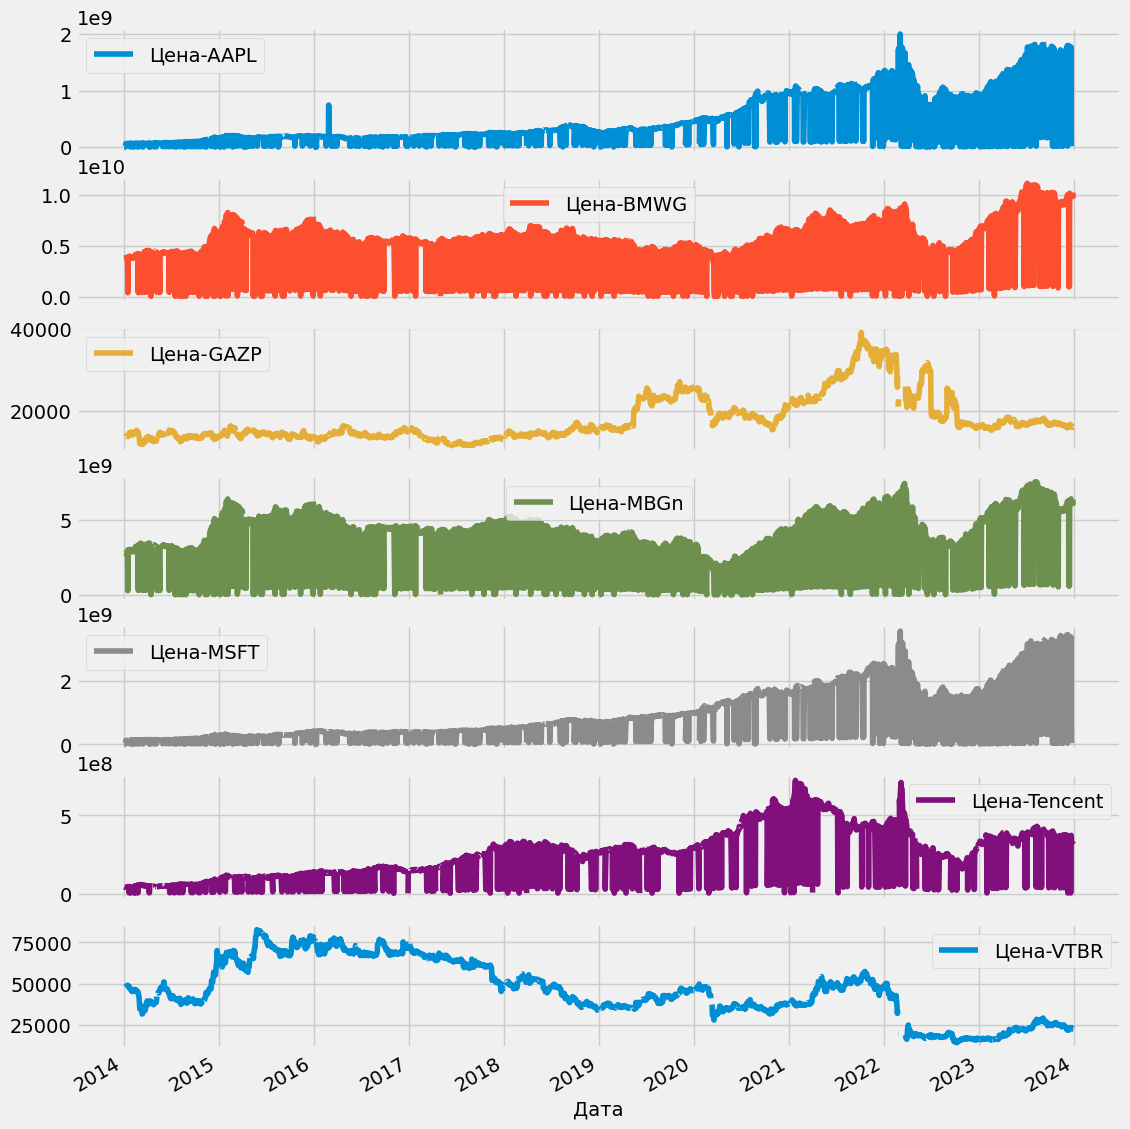

In [44]:
plt.style.use("fivethirtyeight")
df.plot(subplots=True, figsize=(12, 15))

In [45]:
#https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/

C:\Users\Gavrin Gleb\AppData\Local\Temp\ipykernel_26492\2135672741.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


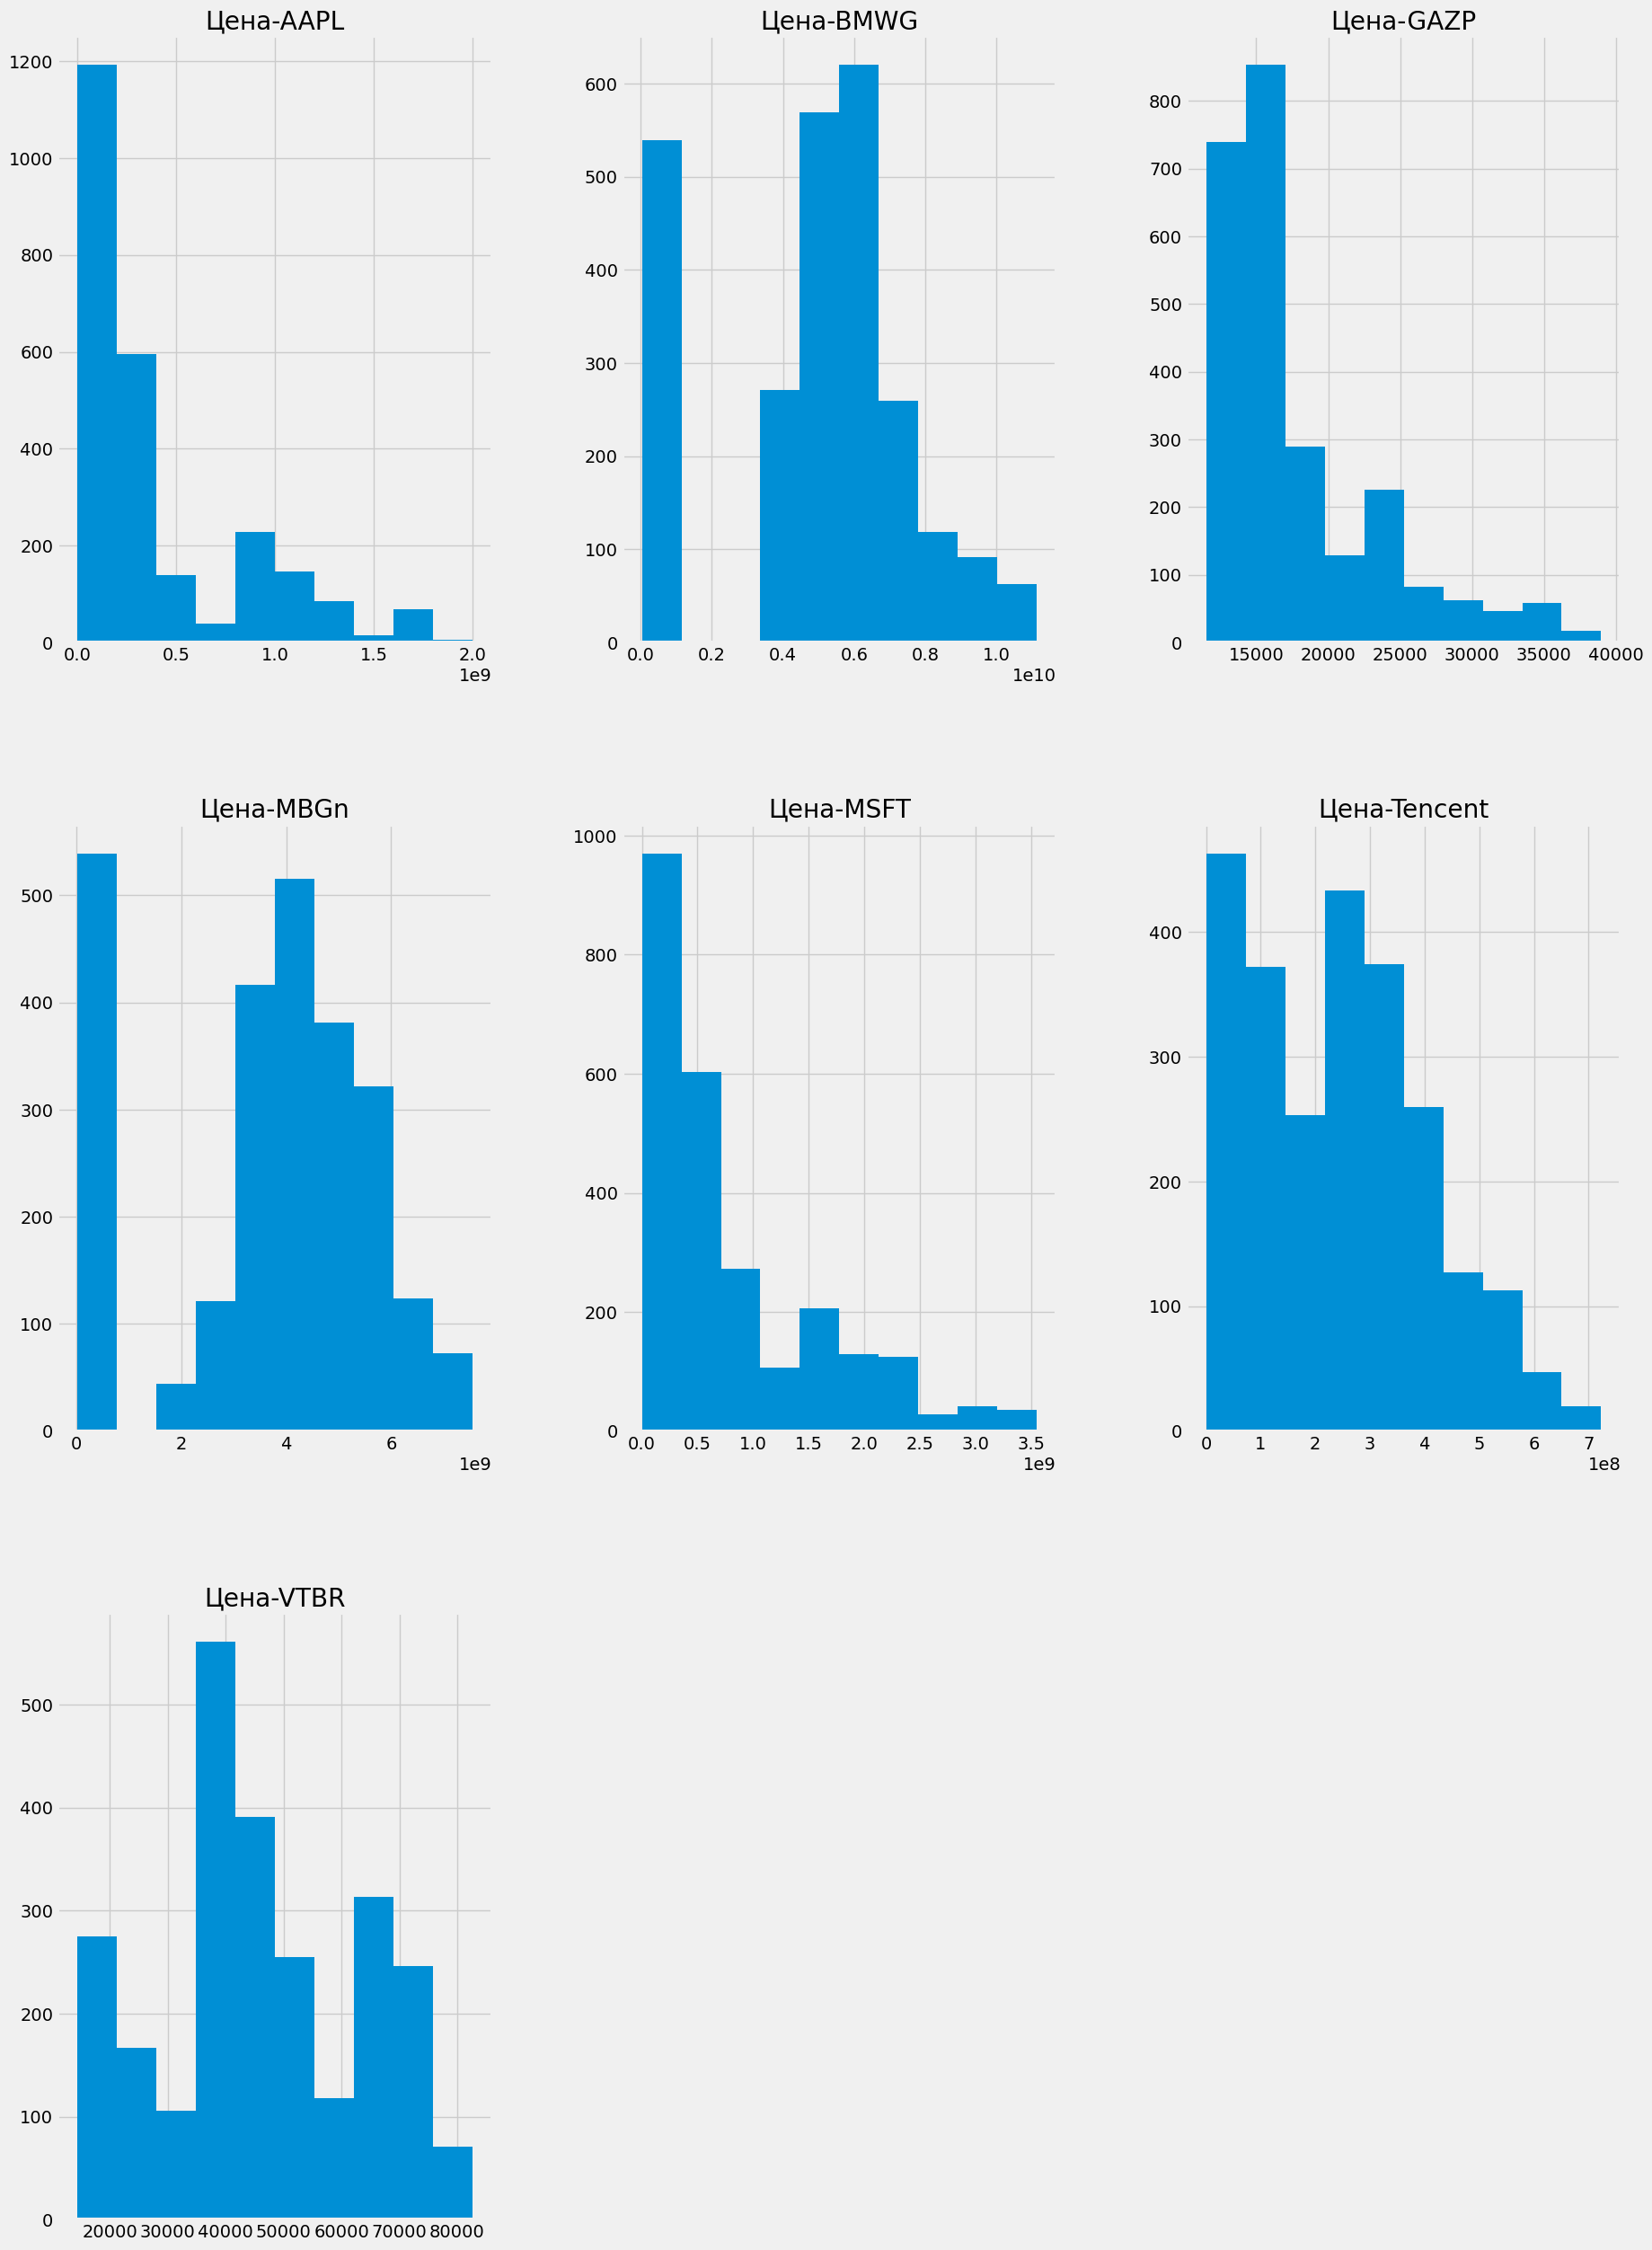

In [46]:
fig = plt.figure(figsize=(20,30))
ax = fig.gca()

df.hist(ax=ax) 
plt.show()

распределение стоимости акций не сильно похоже на нормальное(кроме ВТБ и MBG)

в течение последних 10 лет американский рынок(судя по ценам американских акций) рос, причем серьёзно

российский рынок стагнировал. Некоторые акции просели, некоторые остались на примерно том же уровне

чётко виден(особенно на российских акциях) кризис 2022 года. Он оказал влияние на весь финансовый рынок.

з)

In [47]:
df

,Цена-AAPL,Цена-BMWG,Цена-GAZP,Цена-MBGn,Цена-MSFT,Цена-Tencent,Цена-VTBR
Дата,,,,,,,
2014-01-02,653725.0,3.780519e+09,NaN,2.789909e+09,1229996.0,41802048.0,NaN
2014-01-03,641424.0,3.788674e+09,NaN,2.784887e+09,1225412.0,41055816.0,NaN
2014-01-06,6452703.0,3.756044e+09,13547.0,2.785239e+09,11998773.0,41198177.0,48460.0
2014-01-07,6392706.0,3.770027e+09,NaN,2.815675e+09,12066274.0,40979112.0,NaN
2014-01-08,64396557.0,3.803544e+09,13733.0,2.801876e+09,118640952.0,41651786.0,47910.0
...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,16109.0,NaN,NaN,NaN,23195.0
2023-12-26,176949630.0,NaN,16100.0,NaN,343413356.0,NaN,23160.0
2023-12-27,176288005.0,1.021861e+10,15986.0,6.378490e+09,341413689.0,334333500.0,22875.0


In [48]:
df_pct_change = pd.DataFrame()
df_pct_change = df.pct_change()

C:\Users\Gavrin Gleb\AppData\Local\Temp\ipykernel_26492\1271377486.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct_change = df.pct_change()


In [49]:
df_pct_change.columns = ['доходность-AAPL', 'доходность-BMWG', 'доходность-GAZP', 'доходность-MBGn', 'доходность-MSFT', 'доходность-Tencent', 'доходность-VTBR']
df_pct_change

,доходность-AAPL,доходность-BMWG,доходность-GAZP,доходность-MBGn,доходность-MSFT,доходность-Tencent,доходность-VTBR
Дата,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.018817,0.002157,NaN,-0.001800,-0.003727,-0.017852,NaN
2014-01-06,9.059965,-0.008612,NaN,0.000126,8.791624,0.003467,NaN
2014-01-07,-0.009298,0.003723,0.000000,0.010928,0.005626,-0.005317,0.000000
2014-01-08,9.073443,0.008890,0.013730,-0.004901,8.832443,0.016415,-0.011350
...,...,...,...,...,...,...,...
2023-12-25,0.000000,0.000000,-0.006169,0.000000,0.000000,0.000000,0.009576
2023-12-26,8.934739,0.000000,-0.000559,0.000000,8.965171,0.000000,-0.001509
2023-12-27,-0.003739,0.000683,-0.007081,0.000202,-0.005823,0.034853,-0.012306


In [50]:
#https://www.codecamp.ru/blog/pandas-percent-change/

и)

array([<Axes: xlabel='Дата'>, <Axes: xlabel='Дата'>,
       <Axes: xlabel='Дата'>, <Axes: xlabel='Дата'>,
       <Axes: xlabel='Дата'>, <Axes: xlabel='Дата'>,
       <Axes: xlabel='Дата'>], dtype=object)

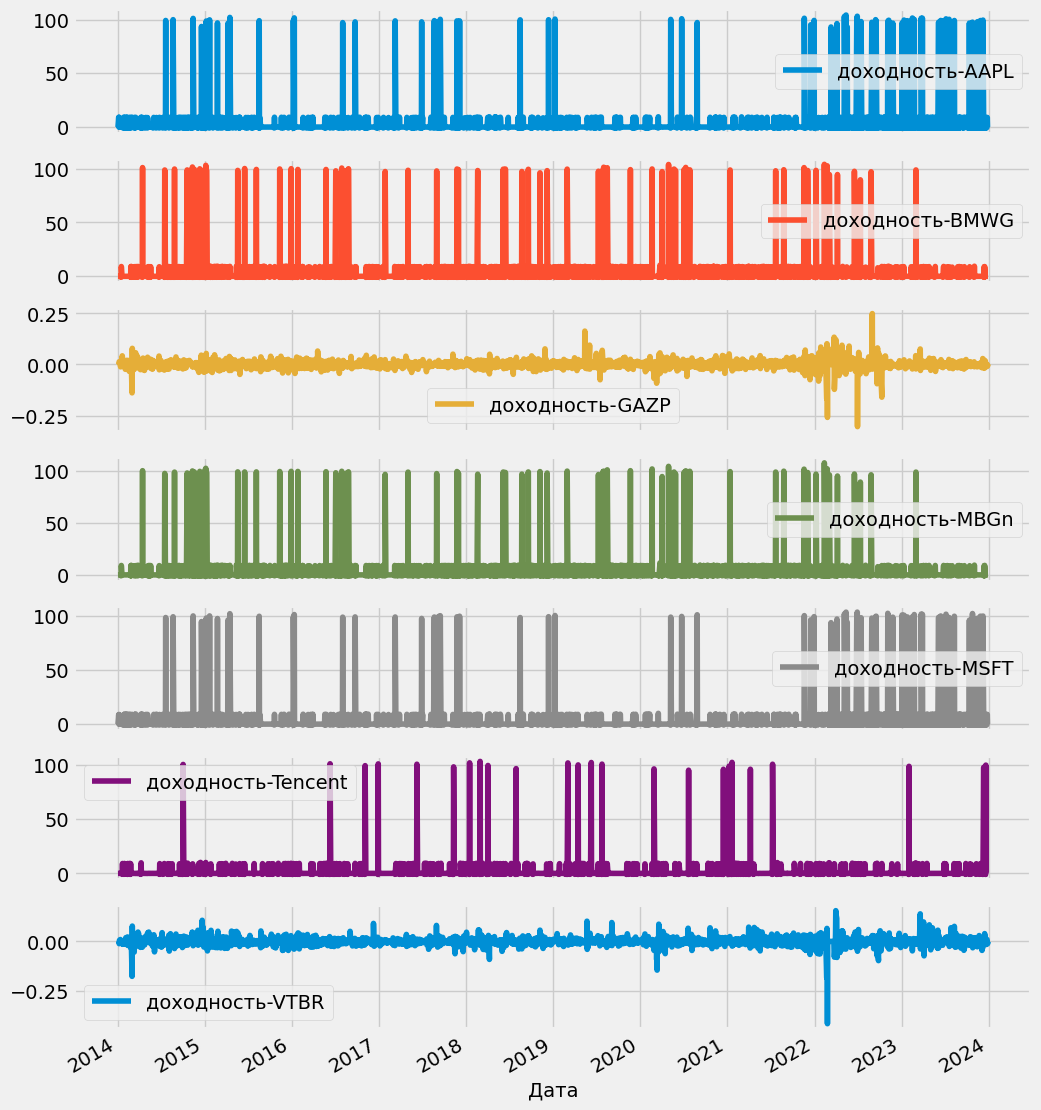

In [51]:
plt.style.use("fivethirtyeight")
df_pct_change.plot(subplots=True, figsize=(11, 15))

Заметим, что доходность российских акций колебалась как выше, так и ниже средней. При этом доходность зарубежных акций если отклонялась от средней, то в большую сторону. Это связано с макроэкономической ситуацией 2014 - 2024 годов. 

Строим гистограммы доходностей:

C:\Users\Gavrin Gleb\AppData\Local\Temp\ipykernel_26492\2505327424.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_pct_change.hist(ax=ax)


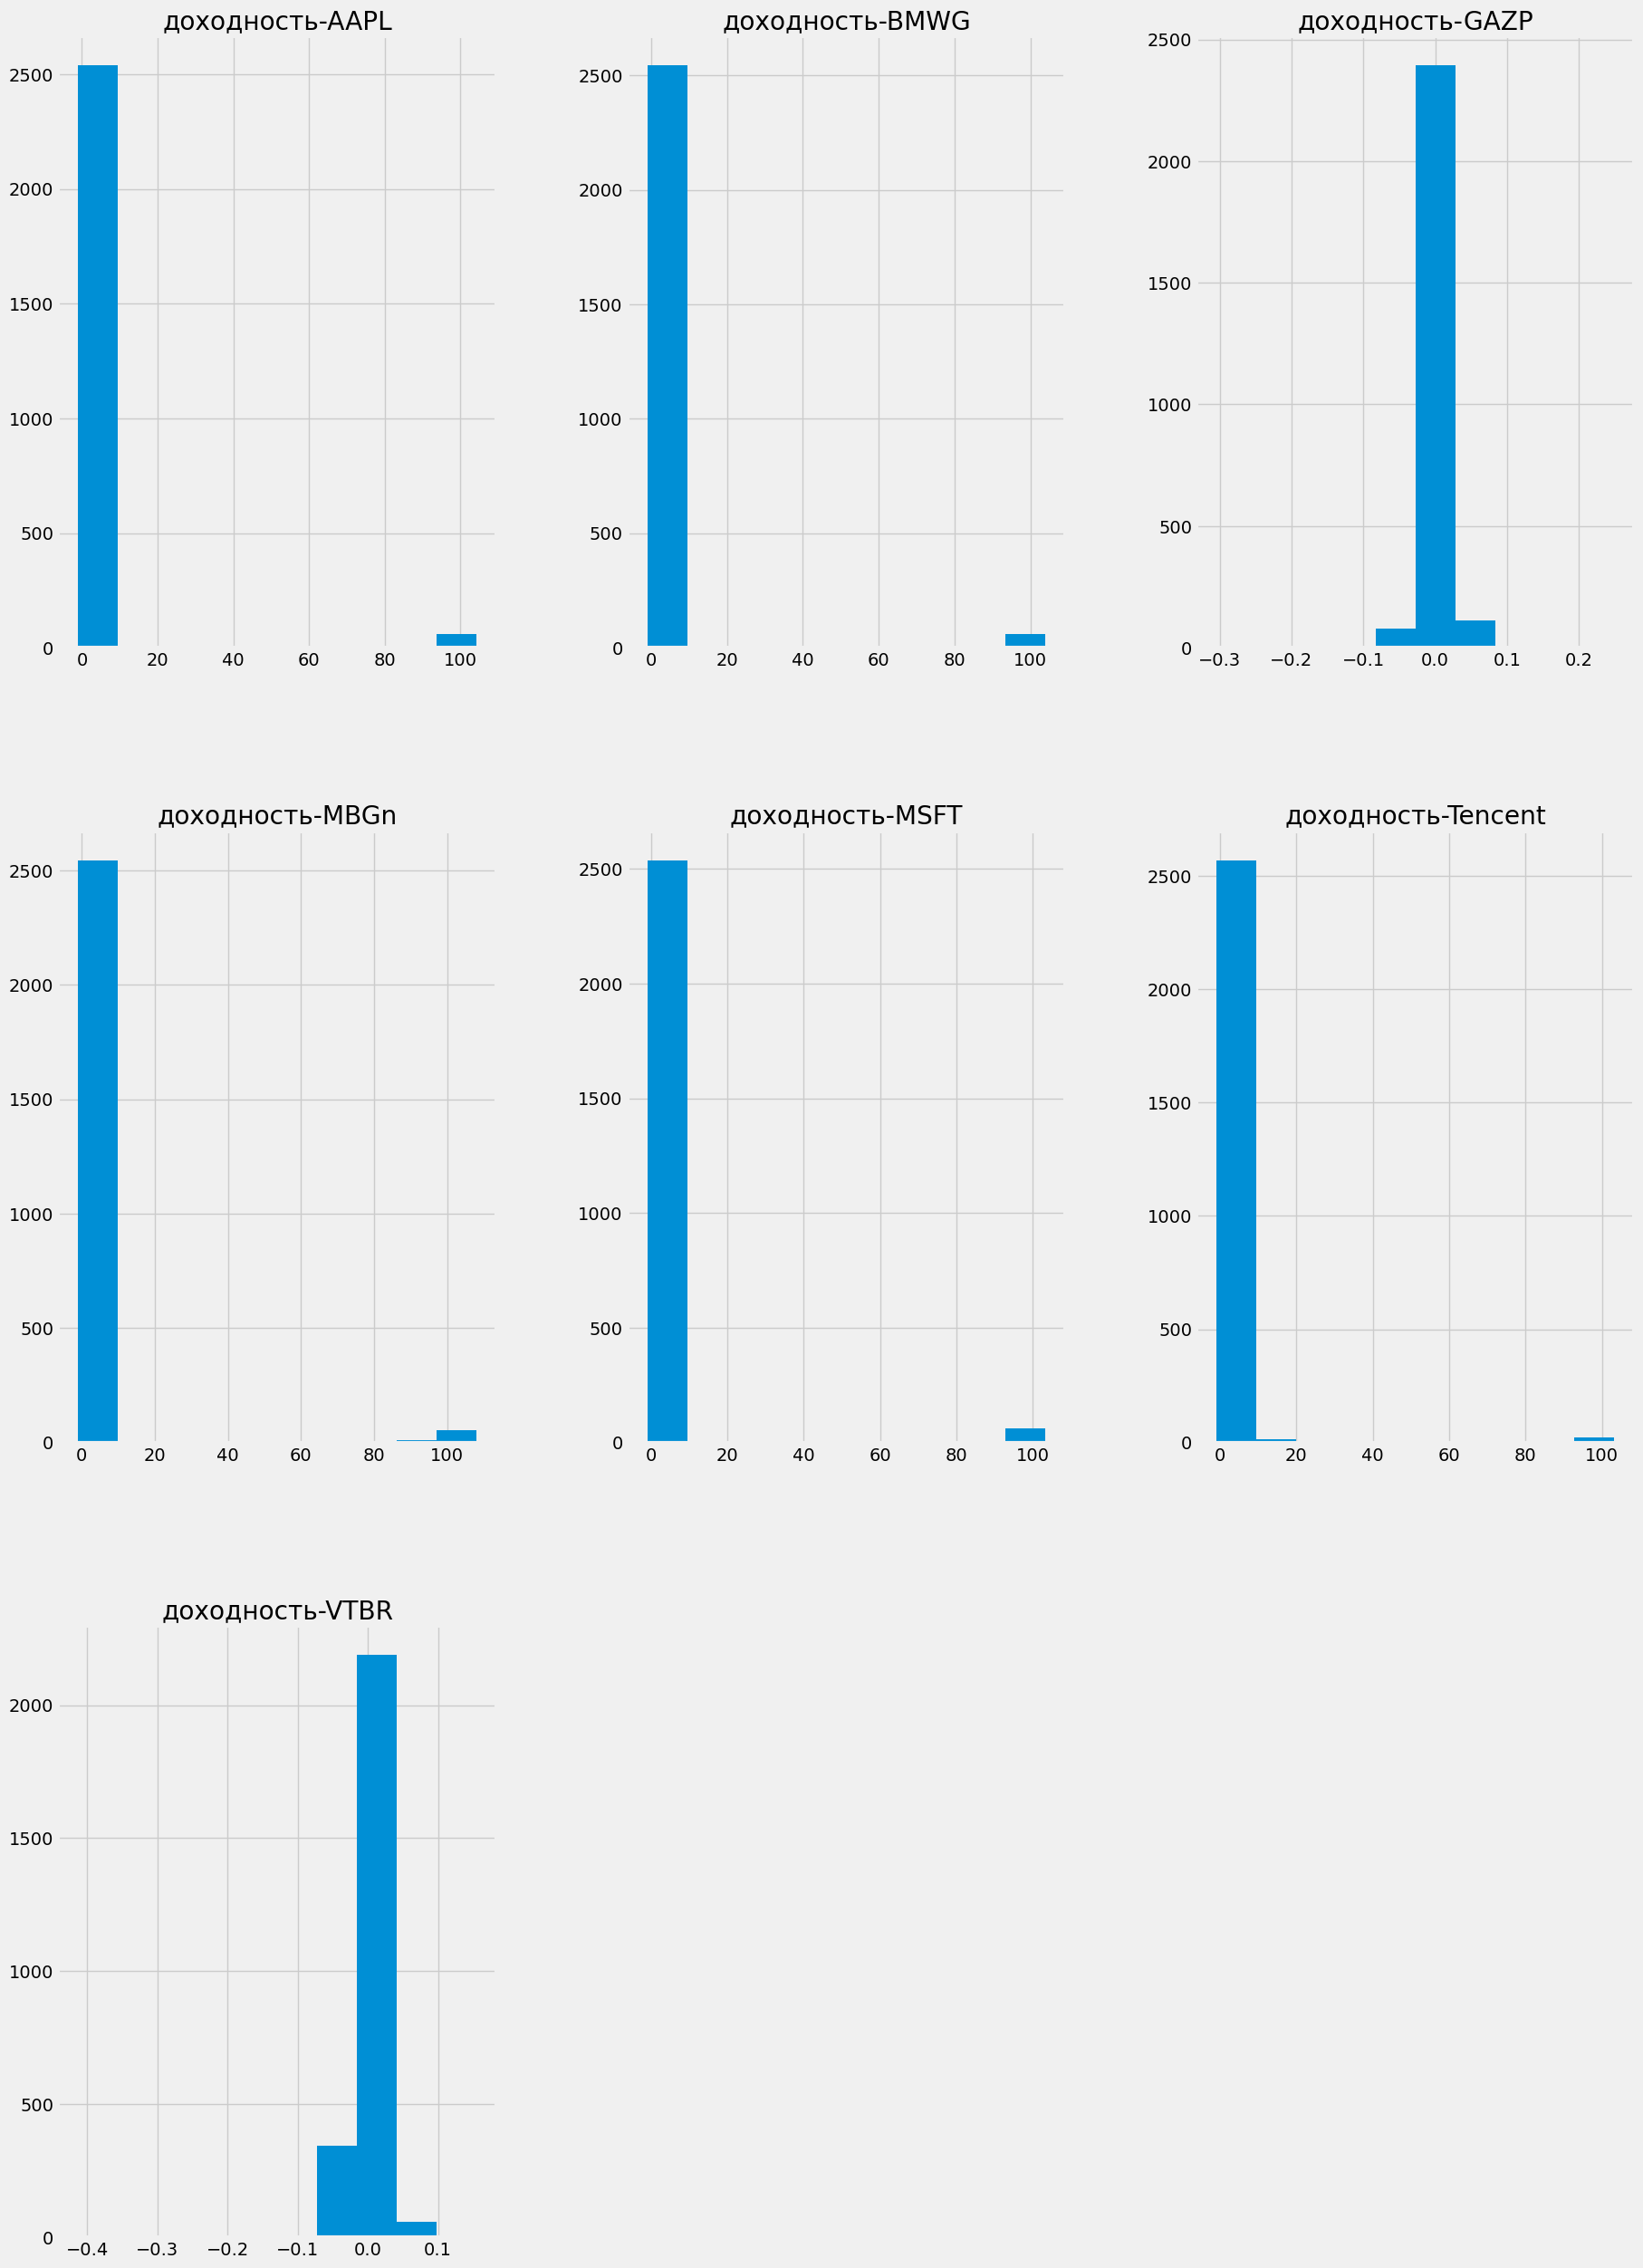

In [52]:
fig = plt.figure(figsize=(20,30))
ax = fig.gca()

df_pct_change.hist(ax=ax) 
plt.show()

Доходности не имеют нормального распределения

Теперь строим ящики с усами

In [53]:
#sns.boxplot(data=df_pct_change, x='Тикер', y='Доходность').set( 
 #   title="Распределение доходностей акций") 

In [54]:
df_pct_change.columns = ['AAPL', 'BMWG', 'GAZP', 'MBGn', 'MSFT', 'Tencent', 'VTBR']
df_pct_change

,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.018817,0.002157,NaN,-0.001800,-0.003727,-0.017852,NaN
2014-01-06,9.059965,-0.008612,NaN,0.000126,8.791624,0.003467,NaN
2014-01-07,-0.009298,0.003723,0.000000,0.010928,0.005626,-0.005317,0.000000
2014-01-08,9.073443,0.008890,0.013730,-0.004901,8.832443,0.016415,-0.011350
...,...,...,...,...,...,...,...
2023-12-25,0.000000,0.000000,-0.006169,0.000000,0.000000,0.000000,0.009576
2023-12-26,8.934739,0.000000,-0.000559,0.000000,8.965171,0.000000,-0.001509
2023-12-27,-0.003739,0.000683,-0.007081,0.000202,-0.005823,0.034853,-0.012306


[Text(0.5, 1.0, 'Распределение доходностей акций')]

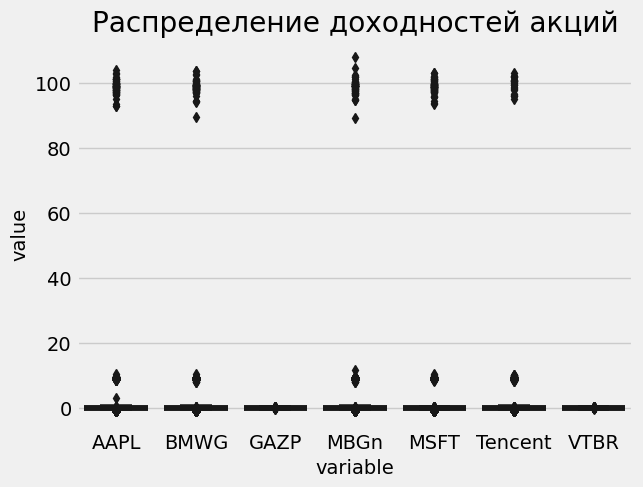

In [55]:
sns.boxplot(data = df_pct_change.melt(), x = 'variable', y = 'value', palette='rocket').set(title="Распределение доходностей акций") 

In [56]:
#https://stackoverflow.com/questions/38120688/how-do-i-create-a-box-plot-for-each-column-in-a-pandas-dataframe

Я убрал подпись "доходность" перед каждым тикером, так как было наслоение

Заметим, что в данных очень много выбросов, о чём говорит форма boxplotов

к)

In [57]:
df_pct_change['mean'] = df_pct_change.abs().mean(axis=1)

In [58]:
df_pct_change

,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR,mean
Дата,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.018817,0.002157,NaN,-0.001800,-0.003727,-0.017852,NaN,0.008870
2014-01-06,9.059965,-0.008612,NaN,0.000126,8.791624,0.003467,NaN,3.572759
2014-01-07,-0.009298,0.003723,0.000000,0.010928,0.005626,-0.005317,0.000000,0.004984
2014-01-08,9.073443,0.008890,0.013730,-0.004901,8.832443,0.016415,-0.011350,2.565882
...,...,...,...,...,...,...,...,...
2023-12-25,0.000000,0.000000,-0.006169,0.000000,0.000000,0.000000,0.009576,0.002249
2023-12-26,8.934739,0.000000,-0.000559,0.000000,8.965171,0.000000,-0.001509,2.557425
2023-12-27,-0.003739,0.000683,-0.007081,0.000202,-0.005823,0.034853,-0.012306,0.009241


In [59]:
#https://translated.turbopages.org/proxy_u/en-ru.ru.10b5a191-660b1c38-79f83c9d-74722d776562/https/stackoverflow.com/questions/33750326/compute-row-average-in-pandas

In [60]:
m = 
top_5_diff['Изм. (RUB) %'] = ... # your code here

top_5_diff

SyntaxError: invalid syntax (2649449440.py, line 1)

# №3

a)

In [61]:
w = np.arange(0, 1.01, 0.01)

In [62]:
w

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [152]:
r1 = ((1 + df_pct_change['AAPL'].mean()/100)**252) - 1
r2 = ((1 + df_pct_change['Tencent'].mean()/100)**252) - 1
#r1
#r2

In [153]:
r1

3694.3764586992957

In [154]:
#r2 = (df_pct_change[['Tencent']].mean())/100

In [155]:
#r2

найдём годовые доходности:

In [156]:
#r1_year = ((1+r1)**252) - 1

In [157]:
#r1_year

In [158]:
#r2_year = ((1+r2)**252) - 1

In [159]:
#r2_year

в)

In [160]:
sd1 = ((df_pct_change['AAPL'].std())/100) * ((252)**(0.5))

In [161]:
sd1

2.435192285807064

In [162]:
sd2 = (df_pct_change['Tencent'].std()/100) * ((252)**(0.5))

In [163]:
sd2

1.5513058769568642

In [164]:
#sd1_year = sd1 * ((252)**(0.5))

In [165]:
#sd1_year

In [166]:
#sd2_year = sd2 * ((252)**(0.5))

In [167]:
#sd2_year

In [168]:
rho = df['Цена-AAPL'].corr(df['Цена-Tencent'])

In [169]:
rho

0.5239764731771365

In [170]:
r_p2_list = []
sd_p2_list = []
for w1 in w:
    r_p2 = w1 * r1 +(1 - w1) * r2
    sd_p2 = np.sqrt(w1**2 * sd1**2 + (1 - w1)**2 * sd2**2 + 2 * w1 * (1 - w1) * rho * sd1 * sd2)
    r_p2_list.append(r_p2)
    sd_p2_list.append(sd_p2)

In [171]:
r_p2_list

[49.05341925673835,
 85.50664965116393,
 121.9598800455895,
 158.41311044001506,
 194.86634083444062,
 231.31957122886624,
 267.7728016232918,
 304.2260320177174,
 340.6792624121429,
 377.13249280656845,
 413.58572320099415,
 450.0389535954197,
 486.4921839898452,
 522.9454143842709,
 559.3986447786964,
 595.8518751731219,
 632.3051055675475,
 668.7583359619731,
 705.2115663563986,
 741.6647967508243,
 778.1180271452499,
 814.5712575396753,
 851.024487934101,
 887.4777183285266,
 923.930948722952,
 960.3841791173777,
 996.8374095118032,
 1033.290639906229,
 1069.7438703006544,
 1106.1971006950798,
 1142.6503310895055,
 1179.1035614839311,
 1215.5567918783568,
 1252.0100222727822,
 1288.4632526672078,
 1324.9164830616335,
 1361.369713456059,
 1397.8229438504845,
 1434.2761742449102,
 1470.7294046393358,
 1507.1826350337615,
 1543.6358654281871,
 1580.0890958226125,
 1616.542326217038,
 1652.9955566114636,
 1689.4487870058892,
 1725.902017400315,
 1762.3552477947405,
 1798.8084781891657,

In [172]:
sd_p2_list

[1.5513058769568642,
 1.5486915514036619,
 1.546355937330173,
 1.544300299314384,
 1.5425257566821162,
 1.5410332805011047,
 1.5398236909514278,
 1.5388976550887268,
 1.5382556850143305,
 1.5378981364639381,
 1.5378252078238999,
 1.5380369395814295,
 1.5385332142122965,
 1.5393137565067274,
 1.5403781343314067,
 1.541725759822667,
 1.5433558910031981,
 1.5452676338119533,
 1.5474599445343753,
 1.5499316326176753,
 1.5526813638536638,
 1.5557076639096037,
 1.5590089221857266,
 1.5625833959764661,
 1.5664292149111025,
 1.5705443856483972,
 1.5749267967989529,
 1.5795742240484116,
 1.5844843354542493,
 1.5896546968888141,
 1.5950827776013579,
 1.6007659558721503,
 1.606701524732306,
 1.6128866977236735,
 1.6193186146740417,
 1.625994347463963,
 1.632910905762676,
 1.6400652427118951,
 1.6474542605376312,
 1.6550748160716424,
 1.662923726165632,
 1.670997772982843,
 1.6792937091532474,
 1.6878082627800899,
 1.6965381422870631,
 1.7054800410969209,
 1.714630642133778,
 1.7239866221427738,
 

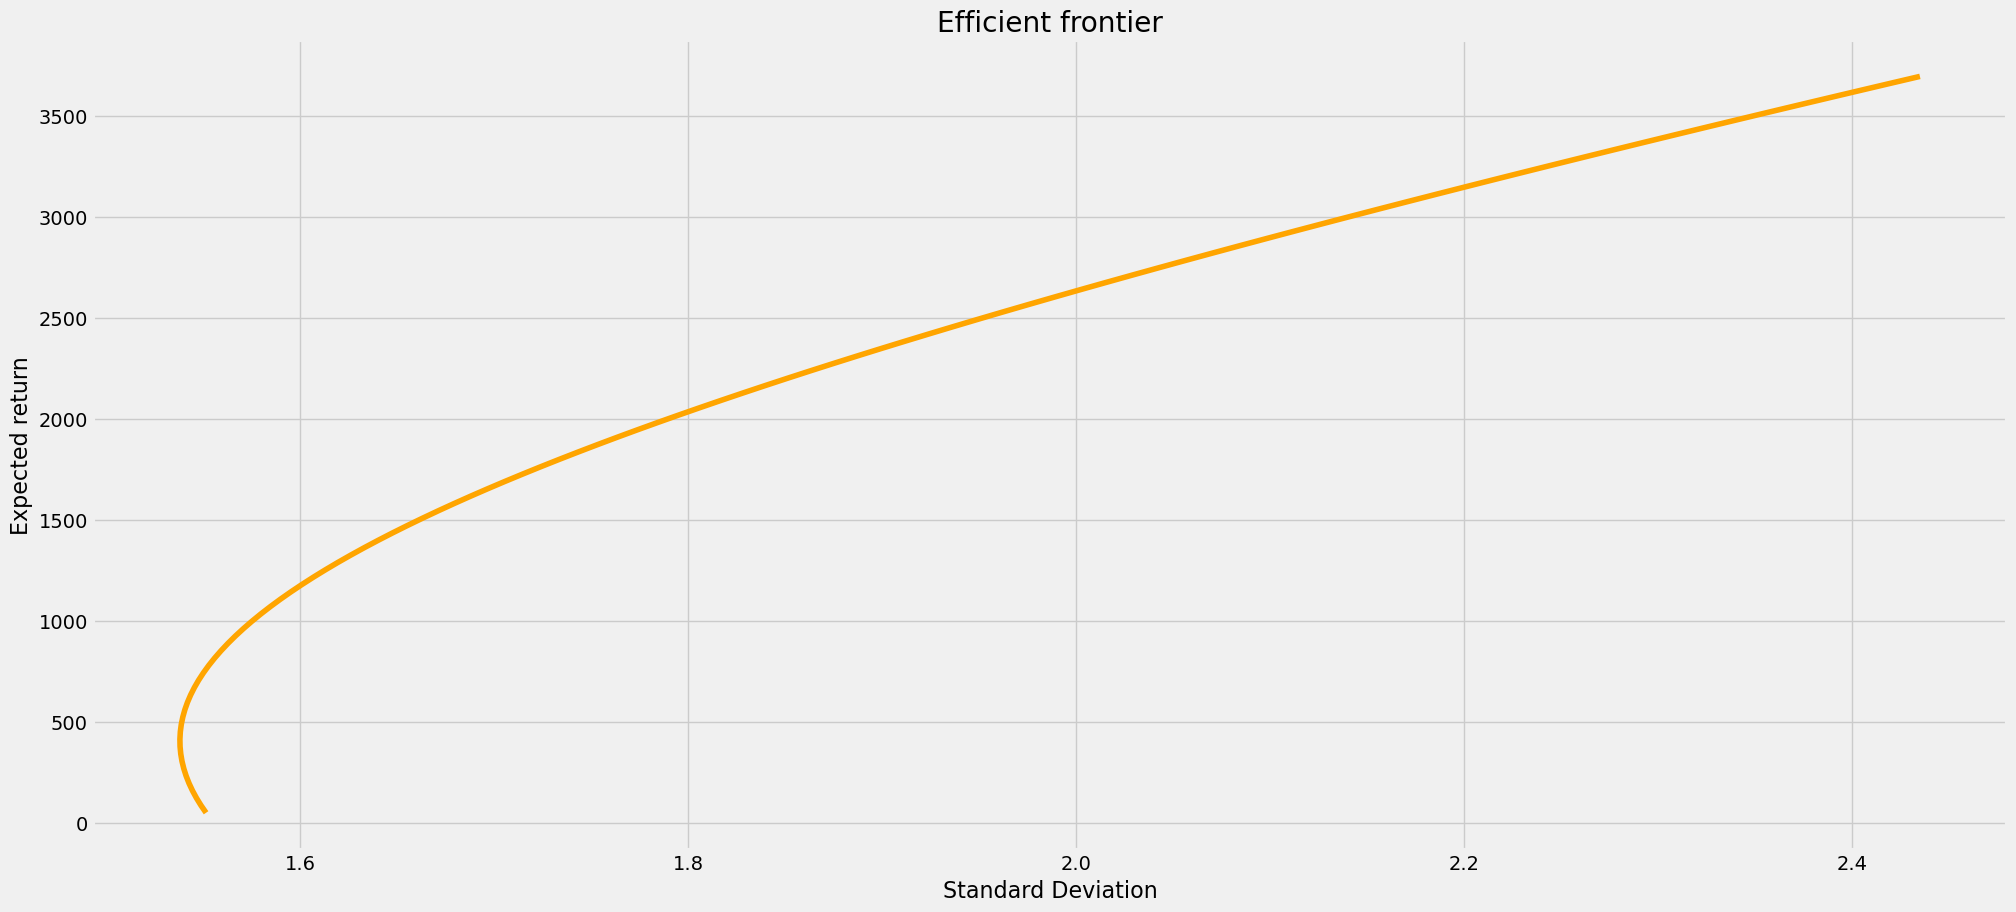

In [225]:
plt.figure(figsize=(22,10))
x1 = np.array(r_p2_list)
y1 = np.array(sd_p2_list)
plt.plot(y1, x1, color='orange')
plt.xlabel('Standard Deviation', fontsize=16)
plt.ylabel('Expected return', fontsize=16)
plt.title('Efficient frontier')
plt.show()

д)

In [179]:
#df_r = pd.DataFrame()

In [180]:
big1 = []
for i in range(len(w)):
    l1 = []
    l1.append(w[i])
    l1.append(sd_p2_list[i])
    l1.append(r_p2_list[i])
    big1.append(l1)

In [181]:
#big1

In [183]:
df_r = pd.DataFrame(big1, columns = ['Вес', 'Риск', 'Доходность'])

In [184]:
df_r

,Вес,Риск,Доходность
0,0.00,1.551306,49.053419
1,0.01,1.548692,85.506650
2,0.02,1.546356,121.959880
3,0.03,1.544300,158.413110
4,0.04,1.542526,194.866341
...,...,...,...
96,0.96,2.370888,3548.563537
97,0.97,2.386851,3585.016768
98,0.98,2.402891,3621.469998
99,0.99,2.419005,3657.923228


In [185]:
#https/www.geeksforgeeks.org/creating-pandas-dataframe-using-list-of-lists/?__ya_mt_enable_static_translations=1

е)

In [186]:
min_sd_p = df_r[df_r.Риск == df_r.Риск.min()]

In [187]:
min_sd_p

,Вес,Риск,Доходность
10,0.1,1.537825,413.585723


In [190]:
#min_sd = min_sd_p[['Риск']]

In [191]:
#min_sd

In [192]:
min_sd = df_r.iloc[10]['Риск']

In [193]:
min_sd

1.5378252078238999

In [194]:
min_sd_p_doh = df_r.iloc[10]['Доходность']

In [195]:
min_sd_p_doh

413.58572320099415

In [196]:
df_eff_p = df_r.loc[(df_r['Риск'] > min_sd) & (df_r['Доходность'] > min_sd_p_doh)]

In [197]:
df_eff_p

,Вес,Риск,Доходность
11,0.11,1.538037,450.038954
12,0.12,1.538533,486.492184
13,0.13,1.539314,522.945414
14,0.14,1.540378,559.398645
15,0.15,1.541726,595.851875
...,...,...,...
96,0.96,2.370888,3548.563537
97,0.97,2.386851,3585.016768
98,0.98,2.402891,3621.469998
99,0.99,2.419005,3657.923228


з)

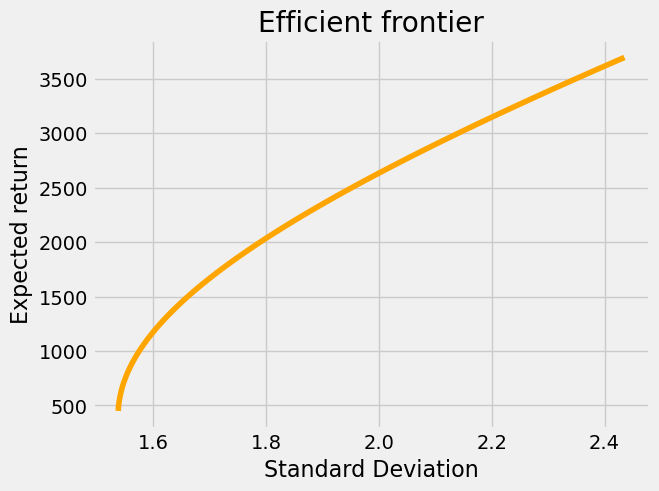

In [224]:
plt.plot(df_eff_p["Риск"], df_eff_p["Доходность"], color='orange')
plt.xlabel('Standard Deviation', fontsize=16)
plt.ylabel('Expected return', fontsize=16)
plt.title('Efficient frontier')
plt.show()

Построили наиболее кривую наиболее эффективных портфелей, отфильтровав датасет

In [200]:
# безрисковая ставка:
r_f = 11.8/100

и)

In [202]:
df_r['Sharp'] = df_r.apply(lambda sharp: (sharp.Доходность - r_f )/sharp.Риск, axis = 1)

In [203]:
df_r

,Вес,Риск,Доходность,Sharp
0,0.00,1.551306,49.053419,31.544662
1,0.01,1.548692,85.506650,55.135995
2,0.02,1.546356,121.959880,78.792907
3,0.03,1.544300,158.413110,102.502804
4,0.04,1.542526,194.866341,126.252894
...,...,...,...,...
96,0.96,2.370888,3548.563537,1496.673835
97,0.97,2.386851,3585.016768,1501.936479
98,0.98,2.402891,3621.469998,1507.081442
99,0.99,2.419005,3657.923228,1512.111525


In [204]:
# смотрел пример здесь: https/www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/?__ya_mt_enable_static_translations=1

й)

In [205]:

max_sharp_p = df_r[df_r.Sharp == df_r.Sharp.max()]

In [206]:
max_sharp_p

,Вес,Риск,Доходность,Sharp
100,1.0,2.435192,3694.376459,1517.029468


In [207]:
max_sharp = df_r.iloc[100]['Sharp']

In [208]:
max_sharp

1517.0294683628877

In [209]:
max_sd_01 = df_r.iloc[100]['Риск']

In [210]:
max_sd_01

2.435192285807064

k)

In [211]:
L1 = [min_sd, max_sd_01]
sigma = np.array(L1)

In [212]:
sigma

array([1.53782521, 2.43519229])

л)

In [213]:
r = max_sharp * sigma + r_f

In [214]:
r

array([2333.04415746, 3694.3764587 ])

м)

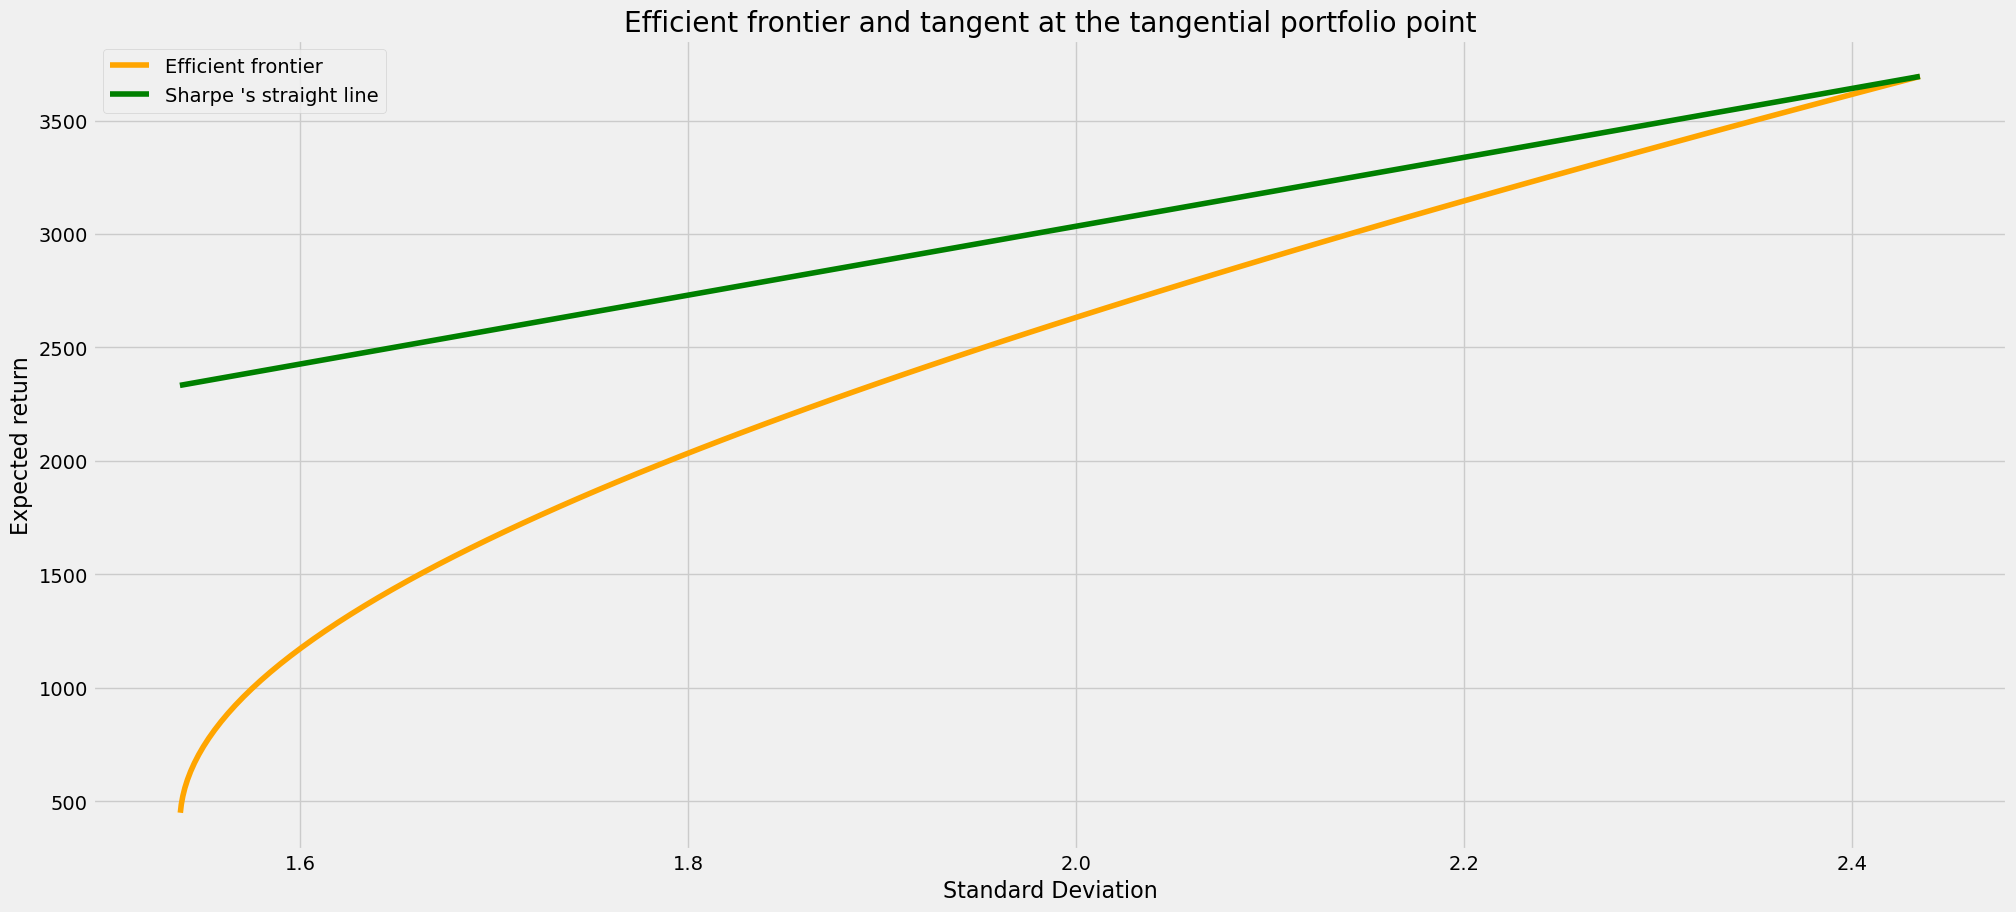

In [223]:
plt.figure(figsize=(22,10))
plt.plot(df_eff_p["Риск"], df_eff_p["Доходность"], color='orange', label='Efficient frontier')
h1 = np.array(sigma)
f1 = np.array(r)
plt.plot(h1, f1, color='green', label="Sharpe 's straight line")
plt.xlabel('Standard Deviation', fontsize=16)
plt.ylabel('Expected return', fontsize=16)
plt.title('Efficient frontier and tangent at the tangential portfolio point')
plt.legend()
plt.show()

н)

максимальный коэффициент Шарпа соответствует последнему наблюдению. Это связано с тем, что ожидаемая доходность портфеля растёт с течением времени намного быстрее, чем стандартное отклонение доходности, при этом r_f не меняется